# Explication de la simulation

   Pour programmer la simulation, on devra d'abord écrire notre fonction $$f(x) = \frac{dx}{dt}$$ puis résoudre l'équation différentielle en utilisant la fonction correspondante integrée en python et enfin créer un graphique qui représentera la situation en utilisant les résultats obtenus.


### Implémentation de la fonction

In [1]:
%matplotlib inline
import numpy as np
from numpy import sin, cos, pi
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Comme tout programme, on doit importer les modules ou fonctions qu'on utilisera.

In [2]:
la = 1.0
lb = 1.0
I = 5.0
m = 1.0
g = 9.8

On définit les variables et les constantes.

In [3]:
def det(x):
    alpha = x[0]
    beta = x[1]
    d = 1/( (I/m + la*la*sin(alpha-beta)*sin(alpha-beta))*lb*lb )
    return d

On définit la fonction déterminant de la matrice.

In [4]:
def dalpha_dtt(x):
    alpha = x[0]
    beta = x[1]
    alphap = x[2] #alpha p = alpha point = dalpha_dt
    betap = x[3]
    B = la*lb*cos(alpha-beta)
    D = lb*lb
    E = g*la*sin(alpha)-la*lb*betap*betap*sin(alpha-beta)
    F = la*lb*alphap*alphap*sin(alpha-beta)+g*lb*sin(beta)
    return (D*E - B*F)*det(x)

On définit notre fonction dalpha/dt^2 en utilisant du calcul matriciel.

In [5]:
def dbeta_dtt(x):
    alpha = x[0]
    beta = x[1]
    alphap = x[2]
    betap = x[3]
    A = I/m + la*la
    C = la*lb*cos(alpha-beta)
    E = g*la*sin(alpha)-la*lb*betap*betap*sin(alpha-beta) 
    F = la*lb*alphap*alphap*sin(alpha-beta)+g*lb*sin(beta) 
    return (-C*E + A*F)*det(x)

De même pour dbeta/dt^2.

In [6]:
def f(x,t):
    alpha = x[0]
    beta = x[1]
    alphap = x[2]
    betap = x[3]
    dxdt = [alphap, betap, dalpha_dtt(x), dbeta_dtt(x)]
    return dxdt

Enfin, on crée notre fonction f qui doit avoir comme paramètre le temps même s'il n'est pas utilisé dans la fonction.


### Résolution de l'équation différentielle

In [7]:
alpha_init = pi/2
beta_init = pi/2
alphap_init = 0.
betap_init = 0.
cond_init = [alpha_init, beta_init, alphap_init, betap_init]

On définit nos conditions initiales.

In [8]:
t = np.linspace(0.0, 4.0, 101)

On crée une liste de 200 valeurs (chaque valeur représente un certain instant t) comprises entre 0s et 4s.

In [9]:
sol = odeint(f, cond_init, t)

On stocke les solutions (valeurs de alpha, beta, dalpha/dt et dbeta/dt) obtenues pour chaque instant dans une variable sol

### Représentation des résultats dans un graphique

In [10]:
theta = np.linspace(0,2*pi, 361)
x_disque = la*cos(theta)
y_disque = la*sin(theta)

On calcule les cordonnées du disque pour ensuite pouvoir le tracer.

In [11]:
alpha = sol[:,0]
x_A = la*sin(alpha)
y_A = la*cos(alpha)
beta = sol[:,1]
x_B = lb*sin(beta) + x_A
y_B = lb*cos(beta) + y_A

De même pour les coordonées du point A (le point où la corde est attachée) et le point B.

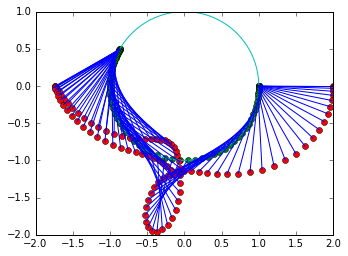

In [12]:
plt.axes().set_aspect('equal')
plt.plot(x_A, y_A, 'go')
plt.plot(x_B, y_B, 'ro')
plt.plot(x_disque , y_disque, 'c-')
for i in range(0,len(x_A)):
    plt.plot([x_A[i], x_B[i]],[y_A[i], y_B[i]], 'b-')

Pour mieux visualiser le mouvement du point B, on trace la corde entre les deux points.

### Conclusion

<IPython.core.display.Javascript object>


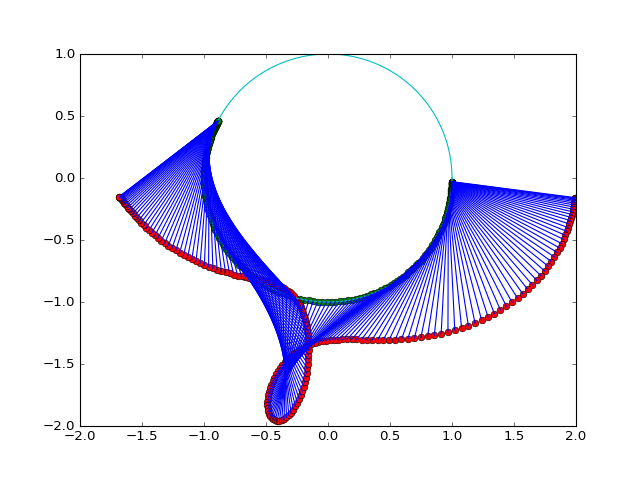

In [15]:
%matplotlib notebook
from IPython.html.widgets import interact
import numpy as np
from numpy import sin, cos, pi
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(x, t, la, lb, I, m, g):
    alpha, beta, alphap, betap = x #alpha p = alpha punto

    A = I/m + la*la
    B = la*lb*cos(alpha-beta)
    C = la*lb*cos(alpha-beta)
    D = lb*lb
    E = g*la*sin(alpha)-la*lb*betap*betap*sin(alpha-beta) 
    F = la*lb*alphap*alphap*sin(alpha-beta)+g*lb*sin(beta) 
    det = (I/m + la*la*sin(alpha-beta)*sin(alpha-beta))*lb*lb
    det = 1./det

    dxdt = [alphap, betap, (D*E-B*F)*det, (-C*E + A*F)*det]
    return dxdt

def h(I,al, be, alp, bep):
    la = 1.
    lb = 1.
    m = 1.
    g = 5.0
    c_ini = [al, be,alp,bep]
    t = np.linspace(0., 4., 201)
    sol = odeint(f, c_ini, t, args=(la,lb,I,m,g))

    a = sol[:,0] ; b = sol[:,1]
    xa = la*sin(a); ya = la*cos(a) #-
    xb = lb*sin(b) + xa; yb = lb*cos(b) + ya #-
    theta = np.linspace(0., 2*pi, 361)
    xc = la*cos(theta) ; yc = la*sin(theta)

    plt.axes().set_aspect('equal')
    plt.plot(xa, ya, 'go')
    plt.plot(xb, yb, 'ro')
    plt.plot(xc, yc, 'c-')
    for i in range(0,len(xa)):
        plt.plot([xa[i], xb[i]],[ya[i], yb[i]], 'b-')
    plt.show()
    
interact(h, I = (0.1, 10.0), al = (0, 2*pi), be = (0, 2*pi), alp = (0.1,10.0), bep = (0.1,10.0))